In [71]:
import os, platform, time, urllib.request, openpyxl, operator
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
from openpyxl import Workbook
from selenium import webdriver
import time
import json
import requests
from bs4 import BeautifulSoup
from fake_useragent import UserAgent
from pprint import pprint
headers = {'User-agent': 'your bot 0.1'}
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib as mpl
import matplotlib.pyplot as plt
import csv
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer,TfidfTransformer
from sklearn.model_selection import train_test_split
import emot
import re
from nltk.tokenize import word_tokenize
from string import punctuation
from nltk.corpus import stopwords
import nltk
nltk.download('wordnet')
import emoji
nltk.download('averaged_perceptron_tagger')
import nltk 
import sys
import os
nltk.download('punkt')
import csv
import datetime
from bs4 import BeautifulSoup
import re
import itertools
import emoji
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, Flatten

[nltk_data] Downloading package wordnet to C:\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to C:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Starting Social Media Scrapper...
Whether you want to use hashtags or username? (Enter 'h' for hastag and 'u' for username)h
Enter keyword to search for: fun
Enter how many posts to scrape from Instagram: 10
Unable to create directory 'data': Directory already exists
Created directory 'data/data_fun'
Created directory 'data/data_fun/img'
Starting Scrapping Instagram
Loading Posts
Loading Data
Loading Caption
[]
['CPkh7stK5YP']
['CPkh7stK5YP', 'CPkS3wuMbb2']
['CPkh7stK5YP', 'CPkS3wuMbb2', 'CPkXe7QnqcW']
['CPkh7stK5YP', 'CPkS3wuMbb2', 'CPkXe7QnqcW', 'CPkTSRol_bd']
['CPkh7stK5YP', 'CPkS3wuMbb2', 'CPkXe7QnqcW', 'CPkTSRol_bd', 'CPkPF0bsgJ_']
['CPkh7stK5YP', 'CPkS3wuMbb2', 'CPkXe7QnqcW', 'CPkTSRol_bd', 'CPkPF0bsgJ_', 'CPkRbhZrjLR']
['CPkh7stK5YP', 'CPkS3wuMbb2', 'CPkXe7QnqcW', 'CPkTSRol_bd', 'CPkPF0bsgJ_', 'CPkRbhZrjLR', 'CPkYOfCsW7a']
['CPkh7stK5YP', 'CPkS3wuMbb2', 'CPkXe7QnqcW', 'CPkTSRol_bd', 'CPkPF0bsgJ_', 'CPkRbhZrjLR', 'CPkYOfCsW7a', 'CPkQAVVly9W']
['CPkh7stK5YP', 'CPkS3wuMbb2', 'CPkXe

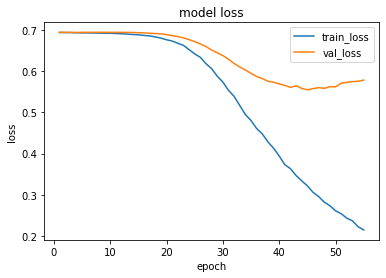

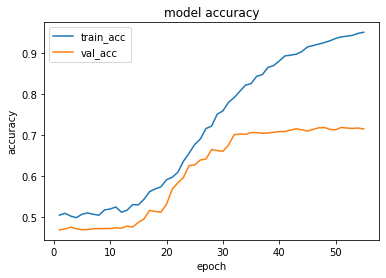

                                                                                                                                      after_stpw  \
0                                                                                                   nfollow emotion udf ufef nlike comment share   
1                                                                                                                  always one win ut behave udee   
2  tuesday let goo nhope good bank hol weekend ut extra day take time actually feel like uve break udcf udffc nfun bday nail udf inspire bab use   
3                                                                                                   dino obsess nback work today lovely day udcf   
4                                                                                           best bank holiday weekend best people nso many smile   
5                                                                                                               

In [80]:
def sarcasm(folder):
    df=pd.read_csv(r"C:\Users\HP\Downloads\Sarcasm_preprocessed.csv")
    X=df['after_stpw'].values
    y=df['label'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    
    vocab_size=10000
    embedding_dim=16
    max_length=32
    trunc_type='post'
    padding_type='post'
    oov_tok='<oov>'
    
    tokenizer= Tokenizer(num_words=vocab_size, oov_token=oov_tok)
    tokenizer.fit_on_texts(X_train)
    word_index=tokenizer.word_index
    training_sequences=tokenizer.texts_to_sequences(X_train)
    training_padded=pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
    testing_sequences=tokenizer.texts_to_sequences(X_test)
    testing_padded=pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
    
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
    model.add(Flatten())

    model.add(Dense(units=32,activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(units=10,activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(units=1,activation='sigmoid'))

    opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    model.summary()
    
    model.fit(x=training_padded, y=y_train, batch_size=256, epochs=60, validation_data=(testing_padded, y_test), verbose=1)
    
    df_m=pd.DataFrame(model.history.history)
    df_m['Epoch']=range(1,61)
    df_m.index=df_m['Epoch']
    df_m
    
    score = model.evaluate(testing_padded, y_test, batch_size=64, verbose=1)
    score_sd = score[1]
    
    data = pd.ExcelFile(folder)
    testing = pd.read_excel(data, 'updated')
    
    tokenizer= Tokenizer(num_words=vocab_size, oov_token=oov_tok)
    tokenizer.fit_on_texts(testing['after_stpw'])

    word_index=tokenizer.word_index
    newdataset_sequences=tokenizer.texts_to_sequences(testing['after_stpw'])
    # print(testing_sequences)
    newdataset_padded=pad_sequences(newdataset_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
    
    predicted = model.predict(newdataset_padded)
    
    testing['sarcasm'] = np.where(predicted>0.5,1,0)
    sarc = testing[testing['sarcasm']==1].count()['sarcasm']
    print("SARCASM",sarc)
    print(score_sd)
    

def MLmodels(folder):
    dataset = pd.read_csv(r'C:\Users\HP\Downloads\preprocessedCaptions-insta.csv', encoding='ISO-8859-1')
    conditionList = [
    dataset['sentiment'] == 0,
    dataset['sentiment'] == 1,
    ]
    choiceList = [0, 1]
    dataset['label'] = np.select(conditionList, choiceList, default='no_label')
    

    vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True).fit(dataset['after_stpw'].values.astype('U'))

    captions = vectorizer.transform(dataset['after_stpw'].values.astype('U'))
    
    X_train, X_test, Y_train, Y_test = train_test_split(captions, dataset['label'], test_size=0.25, random_state=5)
    
    
    
    #Decision Tree
    dec_trees = DecisionTreeClassifier().fit(X_train, Y_train)
    y_predicted_dt = dec_trees.predict(X_test)
    
    cm_dt = confusion_matrix(Y_test,y_predicted_dt)
    cr_dt = classification_report(Y_test,y_predicted_dt)
    score_dt = accuracy_score(Y_test, y_predicted_dt)
    
    
    #Logistic Regression
    log_reg = LogisticRegression(max_iter=100000).fit(X_train, Y_train)
    y_predicted_lg = log_reg.predict(X_test)
    
    cm_lg = confusion_matrix(Y_test,y_predicted_lg)
    cr_lg = classification_report(Y_test,y_predicted_lg)
    score_lg = accuracy_score(Y_test, y_predicted_lg)
    

    #Multinomial Naive Bayes
    MNB = MultinomialNB()
    MNB.fit(X_train, Y_train)
    y_predicted_mnb = MNB.predict(X_test)
    
    cm_mnb = confusion_matrix(Y_test,y_predicted_mnb)
    cr_mnb = classification_report(Y_test, y_predicted_mnb)
    score_mnb = accuracy_score(Y_test, y_predicted_mnb)
    
    
    #Bernoulli Naive Bayes
    BNB = BernoulliNB()
    BNB.fit(X_train, Y_train)
    y_predicted_bnb = BNB.predict(X_test)
    
    cm_bnb = confusion_matrix(Y_test,y_predicted_bnb)
    cr_bnb = classification_report(Y_test, y_predicted_bnb)
    score_bnb = accuracy_score(Y_test, y_predicted_bnb)
    
    
    #Random Forest
    text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
    text_classifier.fit(X_train, Y_train)
    y_predicted_rf = text_classifier.predict(X_test)
    
    cm_rf = confusion_matrix(Y_test, y_predicted_rf)
    cr_rf = classification_report(Y_test, y_predicted_rf)
    score_rf = accuracy_score(Y_test, y_predicted_rf)
    
    
    #SVM
    classifier_linear = svm.SVC(kernel='linear')
    classifier_linear.fit(X_train, Y_train)
    y_predicted_svm = classifier_linear.predict(X_test)
    
    cm_svm = confusion_matrix(Y_test, y_predicted_svm)
    cr_svm = classification_report(Y_test, y_predicted_svm)
    score_svm = accuracy_score(Y_test, y_predicted_svm)
    
    
    
    #Neural Networks
    X=dataset['after_stpw'].values
    y=dataset['sentiment'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    
    vocab_size=10000
    embedding_dim=16
    max_length=32
    trunc_type='post'
    padding_type='post'
    oov_tok='<oov>'
    
    tokenizer= Tokenizer(num_words=vocab_size, oov_token=oov_tok)
    tokenizer.fit_on_texts(X_train)
    # print(tokenizer)

    word_index=tokenizer.word_index
    # print(word_index)

    training_sequences=tokenizer.texts_to_sequences(X_train)
    # print(training_sequences)
    training_padded=pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
    # print(training_padded)

    testing_sequences=tokenizer.texts_to_sequences(X_test)
    # print(testing_sequences)
    testing_padded=pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
    
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
    model.add(Flatten())

    model.add(Dense(units=32,activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(units=10,activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(units=1,activation='sigmoid'))

    opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    model.summary()

    model.fit(x=training_padded, y=y_train, batch_size=256, epochs=55, validation_data=(testing_padded, y_test), verbose=1)
    
    df_m=pd.DataFrame(model.history.history)
    df_m['Epoch']=range(1,56)
    df_m.index=df_m['Epoch']
    df_m
    
    score = model.evaluate(testing_padded, y_test, batch_size=64, verbose=1)
    score_nn = score[1]
    
    plt.plot(df_m['loss'])
    plt.plot(df_m['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'val_loss'])
    plt.show()
    
    plt.plot(df_m['accuracy'])
    plt.plot(df_m['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_acc', 'val_acc'])
    plt.show()
    
    
    
    #Testing dataset
    data = pd.ExcelFile(folder)
    df = pd.read_excel(data, 'updated')
    testing = df
    captions_test = vectorizer.transform(testing['after_stpw'].values.astype('U'))
    
    testing_dt = dec_trees.predict(captions_test)
    testing_mnb = MNB.predict(captions_test)
    testing_bnb = BNB.predict(captions_test)
    testing_lg = log_reg.predict(captions_test)
    testing_rf = text_classifier.predict(captions_test)
    testing_svm = classifier_linear.predict(captions_test)
    
    
    tokenizer= Tokenizer(num_words=vocab_size, oov_token=oov_tok)
    tokenizer.fit_on_texts(testing['after_stpw'])

    word_index=tokenizer.word_index
    newdataset_sequences=tokenizer.texts_to_sequences(testing['after_stpw'])
    # print(testing_sequences)
    newdataset_padded=pad_sequences(newdataset_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
    
    ynew = model.predict(newdataset_padded)
    
    
    testing['DT'] = testing_dt
    testing['MNB'] = testing_mnb
    testing['BNB'] = testing_bnb
    testing['LG'] = testing_lg
    testing['RF'] = testing_rf
    testing['SVM'] = testing_svm
    testing['NN'] = np.where(ynew>0.5,1,0)

    dt = testing[testing['DT']==1].count()['DT']
    mnb = testing[testing['MNB']==1].count()['MNB']
    bnb = testing[testing['BNB']==1].count()['BNB']
    lg = testing[testing['LG']==1].count()['LG']
    rf = testing[testing['RF']==1].count()['RF']
    svm = testing[testing['SVM']==1].count()['SVM']
    nn = testing[testing['NN']==1].count()['NN']
    
    print(dt, mnb, bnb, lg, rf, svm, nn)
    print(score_dt, score_mnb, score_bnb, score_lg, score_rf, score_svm, score_nn)
    
    sarcasm(folder)


def preprocess(folder):
    print(folder)
    data = pd.ExcelFile(folder)
    df = pd.read_excel(data, 'Caption', header=None)
    df=df.dropna()
    
    
    
    def remove(sheet):
        for row in sheet.iter_rows():
            if not all(cell.value for cell in row):
                sheet.delete_rows(row[0].row, 1)
                remove(sheet)
                return
            
            
    book = openpyxl.load_workbook(folder)

    sheet = book['Caption']
    
    for row in sheet:
        remove(sheet)
        
        
    
    def load_dict_smileys():
   
        return {
            ":‑)":"smiley",
            ":-]":"smiley",
            ":-3":"smiley",
            ":->":"smiley",
            "8-)":"smiley",
            ":-}":"smiley",
            ":)":"smiley",
            ":]":"smiley",
            ":3":"smiley",
            ":>":"smiley",
            "8)":"smiley",
            ":}":"smiley",
            ":o)":"smiley",
            ":c)":"smiley",
            ":^)":"smiley",
            "=]":"smiley",
            "=)":"smiley",
            ":-))":"smiley",
            ":‑D":"smiley",
            "8‑D":"smiley",
            "x‑D":"smiley",
            "X‑D":"smiley",
            ":D":"smiley",
            "8D":"smiley",
            "xD":"smiley",
            "XD":"smiley",
            ":‑(":"sad",
            ":‑c":"sad",
            ":‑<":"sad",
            ":‑[":"sad",
            ":(":"sad",
            ":c":"sad",
            ":<":"sad",
            ":[":"sad",
            ":-||":"sad",
            ">:[":"sad",
            ":{":"sad",
            ":@":"sad",
            ">:(":"sad",
            ":'‑(":"sad",
            ":'(":"sad",
            ":‑P":"playful",
            "X‑P":"playful",
            "x‑p":"playful",
            ":‑p":"playful",
            ":‑Þ":"playful",
            ":‑þ":"playful",
            ":‑b":"playful",
            ":P":"playful",
            "XP":"playful",
            "xp":"playful",
            ":p":"playful",
            ":Þ":"playful",
            ":þ":"playful",
            ":b":"playful",
            "<3":"love"
            }


    def load_dict_contractions():

        return {
                "ain't":"is not",
                "amn't":"am not",
                "aren't":"are not",
                "can't":"cannot",
                "'cause":"because",
                "couldn't":"could not",
                "couldn't've":"could not have",
                "could've":"could have",
                "daren't":"dare not",
                "daresn't":"dare not",
                "dasn't":"dare not",
                "didn't":"did not",
                "didn't":"did not",
                "doesn't":"does not",
                "don't":"do not",
                "e'er":"ever",
                "em":"them",
                "everyone's":"everyone is",
                "finna":"fixing to",
                "gimme":"give me",
                "gonna":"going to",
                "gon't":"go not",
                "gotta":"got to",
                "hadn't":"had not",
                "hasn't":"has not",
                "haven't":"have not",
                "he'd":"he would",
                "he'll":"he will",
                "he's":"he is",
                "he've":"he have",
                "how'd":"how would",
                "how'll":"how will",
                "how're":"how are",
                "how's":"how is",
                "I'd":"I would",
                "I'll":"I will",
                "I'm":"I am",
                "i'm":"i am",
                "I'm'a":"I am about to",
                "I'm'o":"I am going to",
                "isn't":"is not",
                "it'd":"it would",
                "it'll":"it will",
                "it's":"it is",
                "I've":"I have",
                "i've": " I have",
                "i'd":"i would",
                "i'll":"i will",
                "kinda":"kind of",
                "let's":"let us",
                "mayn't":"may not",
                "may've":"may have",
                "mightn't":"might not",
                "might've":"might have",
                "mustn't":"must not",
                "mustn't've":"must not have",
                "must've":"must have",
                "needn't":"need not",
                "ne'er":"never",
                "o'":"of",
                "o'er":"over",
                "ol'":"old",
                "oughtn't":"ought not",
                "shalln't":"shall not",
                "shan't":"shall not",
                "she'd":"she would",
                "she'll":"she will",
                "she's":"she is",
                "shouldn't":"should not",
                "shouldn't've":"should not have",
                "should've":"should have",
                "somebody's":"somebody is",
                "someone's":"someone is",
                "something's":"something is",
                "that'd":"that would",
                "that'll":"that will",
                "that're":"that are",
                "that's":"that is",
                "there'd":"there would",
                "there'll":"there will",
                "there're":"there are",
                "there's":"there is",
                "these're":"these are",
                "they'd":"they would",
                "they'll":"they will",
                "they're":"they are",
                "they've":"they have",
                "this's":"this is",
                "those're":"those are",
                "'tis":"it is",
                "'twas":"it was",
                "wanna":"want to",
                "wasn't":"was not",
                "we'd":"we would",
                "we'd've":"we would have",
                "we'll":"we will",
                "we're":"we are",
                "weren't":"were not",
                "we've":"we have",
                "what'd":"what did",
                "what'll":"what will",
                "what're":"what are",
                "what's":"what is",
                "what've":"what have",
                "when's":"when is",
                "where'd":"where did",
                "where're":"where are",
                "where's":"where is",
                "where've":"where have",
                "which's":"which is",
                "who'd":"who would",
                "who'd've":"who would have",
                "who'll":"who will",
                "who're":"who are",
                "who's":"who is",
                "who've":"who have",
                "why'd":"why did",
                "why're":"why are",
                "why's":"why is",
                "won't":"will not",
                "wouldn't":"would not",
                "would've":"would have",
                "y'all":"you all",
                "you'd":"you would",
                "you'll":"you will",
                "you're":"you are",
                "you've":"you have",
                "Whatcha":"What are you",
                "luv":"love",
                "sux":"sucks",
                "lol":"laugh"


            }


    def strip_accents(text):
        if 'ø' in text or  'Ø' in text:
            #Do nothing when finding ø 
            return text   
        text = text.encode('ascii', 'ignore')
        text = text.decode("utf-8")
        return str(text)



    def clean_text(tweet):
         #Special case not handled previously.
        # tweet=tweet.apply(ast.literal_eval).str.decode("utf-8")
        # print(tweet)
        tweet = tweet.replace('\xe2\x80\xa6','').replace('\xe2\x80\x99','')
        #Escaping HTML characters
        tweet = BeautifulSoup(tweet).get_text()
        #Strip accents
        tweet= strip_accents(tweet)
        #Special case not handled previously.
        # tweet = tweet.replace('\xe2\x80\xa6','').replace('\xe2\x80\x99','')
        #Deal with smileys
        #source: https://en.wikipedia.org/wiki/List_of_emoticons
        SMILEY = load_dict_smileys()  
        words = tweet.split()
        reformed = [SMILEY[word] if word in SMILEY else word for word in words]
        tweet = " ".join(reformed)
        #Deal with emojis
        tweet = emoji.demojize(tweet)
        #Removal of hastags/account
        tweet = ' '.join(re.sub(r"(@[A-Za-z0-9_]+)|(#[A-Za-z0-9_]+)|(\[A-Za-z0-9_]+)", " ", tweet).split())
        #Removal of address
        tweet = ' '.join(re.sub("(\w+:\/\/\S+)", " ", tweet).split())
        
        #Lower case
        tweet = tweet.lower()
        
        tweet = tweet.replace(":"," ")
        tweet = ' '.join(tweet.split())
        #CONTRACTIONS source: https://en.wikipedia.org/wiki/Contraction_%28grammar%29
        CONTRACTIONS = load_dict_contractions()
        tweet = tweet.replace("’","'")
        words = tweet.split()
        reformed = [CONTRACTIONS[word] if word in CONTRACTIONS else word for word in words]
        tweet = " ".join(reformed)
        
        #Removal of Punctuation
        tweet = ' '.join(re.sub("[\.\,\!\?\:\;\-\=]", " ", tweet).split())
#         removal of 'rt' from tweet
        tweet = ' '.join(re.sub('rt @[\w_]+: ','', tweet).split())  
        tweet = ' '.join(re.sub('rt at_user[\w_]+: ','', tweet).split())        
        #specific cleaning
        tweet = tweet.replace(" 's","").replace('*','').replace(':',"").replace('&','').replace("'s","").replace("'","").replace('"','').replace(">","").replace("<","").replace("$","")
        #removal of digits
        
        tweet = ' '.join(re.sub('\d+', '', tweet).split())
        
        #removal of wildcard characters
        tweet=" ".join(re.sub("\W"," ",tweet).split())
        
        #removing single characters e.g. jack's (if s left from apostrophe)
        tweet=" ".join(re.sub(r"\s+[a-zA-Z]\s+", " ",tweet).split()) 
       
        #Removal of text in brackets ("text")
        tweet = " ".join(re.sub('\([^)]*\)', "",tweet).split())
        
        #Remaoval of sqaure brackets from text "[]"
        tweet = tweet.replace('[','').replace(']','')
        
#         #removal of &
#         tweet=" ".join(re.sub(r'[.*?]',"",tweet).split()
        # Standardizing words
        tweet = ''.join(''.join(s)[:2] for _, s in itertools.groupby(tweet))
        #removal of stop words

        tweet = " ".join(re.sub('bat_user', "",tweet).split())
        tweet = " ".join(re.sub('at_user', "",tweet).split())
        tweet=" ".join(re.sub(r'b("\'")', "",tweet).split())
        

        
                
       
        # DO NOT REMOVE STOP WORDS FOR SENTIMENT ANALYSIS - OR AT LEAST NOT NEGATIVE ONES
        return tweet
      
        
    df['url_cleaned'] = [re.sub(r"http\S+", "", tweet) for tweet in df[0]] 
    df['clean_text'] = [clean_text(tweet) for tweet in df["url_cleaned"]] 
    
    def clanrt(tweet):
        tweet = ' '.join(re.sub('rt ','', tweet).split())
        return tweet
    
    df['clean_text'] = [clanrt(tweet) for tweet in df["clean_text"]]
    pd.set_option('display.max_colwidth', 5000)
    
    def lemmatize_with_postag(sentence):
        sent = TextBlob(sentence)
        tag_dict = {"J": 'a', 
                    "N": 'n', 
                    "V": 'v', 
                    "R": 'r'}
        words_and_tags = [(w, tag_dict.get(pos[0], 'n')) for w, pos in sent.tags]    
        lemmatized_list = [wd.lemmatize(tag) for wd, tag in words_and_tags]
        return " ".join(lemmatized_list)
    
    df['lemma_text'] = [lemmatize_with_postag(tweet) for tweet in df["clean_text"]]
    
    def rem_stpw(tweet):
        #excluding words not in list not_rm

        not_rm = ['no','not','nor','like','very','again','what','above','up','below','despite','but','unlikely']
        new_stpwords = [word for word in stopwords.words('english') if word not in not_rm ]
        #print(new_stpwords)
        tweet = tweet.split()
        str2 = [word for word in tweet if word not in new_stpwords]

        a = ' '.join(str2) #word2vec require's o/p as list of words from sentence
        return a
    
    df['after_stpw']=[rem_stpw(sent) for sent in df['lemma_text']]
    
    def rem_stpw(sent):
        stopwords = ['xa','xe','xf','xd ','url','xb','url','bat_user','xbe','x','xaf','xaa','xc','the','xt','xs',
                     'for','and','a','this','I','just','it','are','but','xae','xbf','xre','xve','xd','xm','xxzz','n', 'u', 'udc', 'ude', 'udd', 'ud','udcc', 'udcbd', 'udcb','udcbe','ufb','ue','ub','ucb','uf','ua']
        querywords = sent.split()
        resultwords  = [word for word in querywords if word.lower() not in stopwords]
        result = ' '.join(resultwords)
        return result
    
    
    df['after_stpw']=[rem_stpw(sent) for sent in df['after_stpw'] ]
    
    
    writer = pd.ExcelWriter(folder, engine = 'openpyxl', mode = 'a')
    df['after_stpw'].to_excel(writer, sheet_name = 'updated', index = False)
    # df2.to_excel(writer, sheet_name = 'x2')
    writer.save()
    writer.close()
    
    

def loadandDump():
    class using_hashtags:
        def Create_Dir(self, dir_name):
            if not os.path.exists("data"):
                try:
                    os.mkdir("data")
                    print("Created directory 'data'")
                except:
                    print("Unable to create directory 'data': Directory already exists")
            else:
                print("Unable to create directory 'data': Directory already exists")

            if not os.path.exists("data/data_" + dir_name):
                try:
                    os.mkdir("data/data_" + dir_name)
                    print("Created directory 'data/data_" + dir_name + "'")
                except:
                    print("Unable to create directory 'data/data_" + dir_name + "': Directory already exists")
            else:
                print("Unable to create directory 'data/data_" + dir_name + "': Directory already exists")

            if not os.path.exists("data/data_" + dir_name + '/img'):
                try:
                    os.mkdir("data/data_" + dir_name + '/img')
                    print("Created directory 'data/data_" + dir_name + "/img'")
                except:
                    print("Unable to create directory 'data/data_" + dir_name + "/img': Directory already exists")
            else:
                print("Unable to create directory 'data/data_" + dir_name + "/img': Directory already exists")



        def Scrape_Instagram(self, tag, limit, browser='chrome'):
            self.Create_Dir(tag)

            print("Starting Scrapping Instagram")
            file_path = "data/data_" + tag
            keyword = tag
                # Adding path.
            if not os.getcwd() in os.get_exec_path():
                    # print('adding path')
                if platform.system() == "Windows":
                    os.environ["PATH"] = os.environ["PATH"] + ";" + os.getcwd()
                else:
                    os.environ["PATH"] = os.environ["PATH"] + ":" + os.getcwd()

            # opening instagram in browser
            if 'chrome' in browser.lower():
                driver = webdriver.Chrome(executable_path = r"C:\Users\HP\Desktop\Final Project\chromedriver.exe")
            else:
                driver = webdriver.Firefox()
            driver.get("https://www.instagram.com/" + "explore/tags/" + tag)

            print("Loading Posts")
            time.sleep(10)
            print("Loading Data")

                # Clicking on load more once to load more images. Afterwards we will just
                # tap space to scroll to the page end to load more images
            actions = ActionChains(driver)
            actions.send_keys(Keys.SPACE).perform()
            actions.send_keys(Keys.SPACE).perform()
            actions.send_keys(Keys.SPACE).perform()

            time.sleep(5)



            img_src = []
            img_caption = []
            hashtags = {}


            time.sleep(10)
            print("Loading Caption")


            cap = []


            c = 0
            for x in driver.find_elements_by_tag_name("a"):
    #             print(x.get_attribute("href").split("/")[4])

                item = x.get_attribute("href").split("/")[4]
                print(cap)
                cap.append(item)
                c += 1
                if len(cap) == limit:
                    break
                else:
                    if c == 20:
                        c = 0
                        time.sleep(60)
                    else:
                        continue
                    continue



            print(cap)

            count = 0

            for p in cap:
                url = f"https://www.instagram.com/p/{p}/"

                soup = BeautifulSoup(
                    requests.get(url, headers=headers).text, "html.parser"
                    )
                data = str(soup.find("script", {"type": "application/ld+json"}))

                caption = data[data.find('"caption":')+11 : data.find('","representativeOfPage"')]
                if TextBlob(caption).detect_language() == 'en':
    #                 print("ENGLISH")
                    img_caption.append(caption)

    #             print(caption)

                data_img = str(soup.find("body"))
                image = data_img[data_img.find("src")+6 : data_img.find('","config_width"')]
                img_src.append(image.replace('\\u0026', '&'))

    #             print(img_src)

                count += 1
                if count >= 15:
                    time.sleep(60)
                    count = 0
                else:
                    continue
#             print("img_caption/:", img_caption)




            tag_File = file_path + "/" + tag + "_Instagram.xlsx"
            
            wb = openpyxl.Workbook()
            ws_Captions = wb.create_sheet(title="Caption")
            col = 'A'
            row = 1

            print("Dumping data in excel file")
            for caption in img_caption:
                if caption!=None:
                    tags = caption.split("#")
#                         # write caption to excel file
                    ws_Captions[col + str(row)] = tags[0]
                    row += 1
                    

                    # strip tags
                tags = tags[1:]
                for tag in tags:
                    cleaned = tag.replace(" ", "").replace("\n", "")
                    cleaned = cleaned.lower()
                    if cleaned not in hashtags and len(cleaned) < 20:
                        hashtags[cleaned] = 1
                    elif cleaned in hashtags and len(cleaned) < 20:
                        hashtags[cleaned] = hashtags[cleaned] + 1

            # sort hashtags with frequencies and store them in excel
            hashtags = sorted(hashtags.items(), key=operator.itemgetter(1), reverse=True)

#             ws_Tags = wb.create_sheet(title="Tags")
#             tagName = 'A'
#             tagFreq = 'B'
#             row = 1

#             for tag in hashtags:
#                 ws_Tags[tagName + str(row)] = tag[0]
#                 ws_Tags[tagFreq + str(row)] = tag[1]
#                 row += 1

            wb.save(tag_File)

            print("Dumping Images. This will take some time!")
            row = 1
            for src in img_src:
                urllib.request.urlretrieve(src, file_path + '/img/Instagram_' + str(row) + ".jpeg")
                row += 1
                if (row % 10 == 0):
                    print("(" + str(row) + "/" + str(len(img_src)) + ") Images Downloaded")

            print("Closing Instagram")
            driver.quit()
            preprocess(tag_File)
            MLmodels(tag_File)



    
    class using_username:

        def Create_Dir(self, dir_name):
            if not os.path.exists("data"):
                try:
                    os.mkdir("data")
                    print("Created directory 'data'")
                except:
                    print("Unable to create directory 'data': Directory already exists")
            else:
                print("Unable to create directory 'data': Directory already exists")

            if not os.path.exists("data/data_" + dir_name):
                try:
                    os.mkdir("data/data_" + dir_name)
                    directory = "data/data_" + dir_name 
                    preprocess(directory)
                    print("Created directory 'data/data_" + dir_name + "'")
                except:
                    print("Unable to create directory 'data/data_" + dir_name + "': Directory already exists")
            else:
                print("Unable to create directory 'data/data_" + dir_name + "': Directory already exists")

            if not os.path.exists("data/data_" + dir_name + '/img'):
                try:
                    os.mkdir("data/data_" + dir_name + '/img')
                    print("Created directory 'data/data_" + dir_name + "/img'")
                except:
                    print("Unable to create directory 'data/data_" + dir_name + "/img': Directory already exists")
            else:
                print("Unable to create directory 'data/data_" + dir_name + "/img': Directory already exists")


        def username(self, name):

            self.Create_Dir(name)

            file_path = "data/data_" + name
            keyword = name

            driver = webdriver.Chrome(executable_path = r"C:\Users\HP\Desktop\Final Project\chromedriver.exe")    
            driver.get("https://www.instagram.com/"  + name + "/?__a=1")

            img_caption = []
            img_src = []
            hashtags = {}
            r = requests.get("https://www.instagram.com/" + name + "/?__a=1", headers = {'User-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.106 Safari/537.36'}).text
            print(r)
            j = json.loads(r)

            for i in range(len(j['graphql']['user']['edge_felix_video_timeline']['edges'])):
    #             pprint(j['graphql']['user']['edge_felix_video_timeline']['edges'][i]['node']['edge_media_to_caption']['edges'][0]['node']['text'])
                img_caption.append(j['graphql']['user']['edge_felix_video_timeline']['edges'][i]['node']['edge_media_to_caption']['edges'][0]['node']['text'])
            print(img_caption)

            for i in range(len(j['graphql']['user']['edge_felix_video_timeline']['edges'])):
    #             pprint(j['graphql']['user']['edge_felix_video_timeline']['edges'][i]['node']['display_url'])
                img_src.append(j['graphql']['user']['edge_felix_video_timeline']['edges'][i]['node']['display_url'])
    #         print(img_src)



            tag_File = file_path + "/" + name + "_Instagram.xlsx"
            wb = openpyxl.Workbook()
            ws_Captions = wb.create_sheet(title="Caption")
            col = 'A'
            row = 1

            print("Dumping data in excel file")
            for caption in img_caption:
                tags = caption.split("#")
                    # write caption to excel file
                ws_Captions[col + str(row)] = tags[0]
                row += 1

                    # strip tags
                tags = tags[1:]
                for tag in tags:
                    cleaned = tag.replace(" ", "").replace("\n", "")
                    cleaned = cleaned.lower()
                    if cleaned not in hashtags and len(cleaned) < 20:
                        hashtags[cleaned] = 1
                    elif cleaned in hashtags and len(cleaned) < 20:
                        hashtags[cleaned] = hashtags[cleaned] + 1

            # sort hashtags with frequencies and store them in excel
            hashtags = sorted(hashtags.items(), key=operator.itemgetter(1), reverse=True)

            ws_Tags = wb.create_sheet(title="Tags")
            tagName = 'A'
            tagFreq = 'B'
            row = 1

            for tag in hashtags:
                ws_Tags[tagName + str(row)] = tag[0]
                ws_Tags[tagFreq + str(row)] = tag[1]
                row += 1

            wb.save(tag_File)

            print("Dumping Images. This will take some time!")
            row = 1
            for src in img_src:
                urllib.request.urlretrieve(src, file_path + '/img/Instagram_' + str(row) + ".jpeg")
                row += 1
                if (row % 10 == 0):
                    print("(" + str(row) + "/" + str(len(img_src)) + ") Images Downloaded")


                
    if __name__ == '__main__':

        print("Starting Social Media Scrapper...")

        choice = input("Whether you want to use hashtags or username? (Enter 'h' for hastag and 'u' for username)") 

        if choice == 'h':
            hashtag = using_hashtags()

            keyword = str(input("Enter keyword to search for: "))
            insta_limit = int(input("Enter how many posts to scrape from Instagram: "))

            hashtag.Scrape_Instagram(tag=keyword,
                                 limit=insta_limit,
                                  browser='chrome')


        elif choice == 'u':
            user = using_username()
    #         insta_limit = int(input("Enter how many posts to scrape from Instagram: "))

            keyword = str(input("Enter username to search for: "))
            user.username(keyword)

        else:
            print("Wrong Choice!")






        print("Stopping Social Media Scrapper...")
        
loadandDump()
    

In [67]:
def remove(sheet):
    for row in sheet.iter_rows():
        if not all(cell.value for cell in row):
            sheet.delete_rows(row[0].row, 1)
            remove(sheet)
            return
            
            
book = openpyxl.load_workbook('data/data_fun/fun_Instagram.xlsx')
sheet = book['Caption']
print("Maximum rows before removing:", sheet.max_row)
for row in sheet:
    remove(sheet)
    
print("Maximum rows after removing:",sheet.max_row)

Maximum rows before removing: 4
Maximum rows after removing: 3


5
Unable to create directory 'data': Directory already exists
Unable to create directory 'data/data_fun': Directory already exists
Unable to create directory 'data/data_fun/img': Directory already exists
Starting Scrapping Instagram
Loading Posts
Loading Data
Loading Caption
[]
['CPlV_m0scG1']
['CPlV_m0scG1', 'CPlX7FWhikz']
['CPlV_m0scG1', 'CPlX7FWhikz', 'CPlZ_FwlwwD']
['CPlV_m0scG1', 'CPlX7FWhikz', 'CPlZ_FwlwwD', 'CPlX88lsdhm']
5 5
['CPlV_m0scG1', 'CPlX7FWhikz', 'CPlZ_FwlwwD', 'CPlX88lsdhm', 'CPlPVx8ruNI']
Dumping data in excel file
Dumping Images. This will take some time!
Closing Instagram
data/data_fun/fun_Instagram.xlsx
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 32, 16)            160000    
_________________________________________________________________
flatten_8 (Flatten)          (None, 512)               0         
_______________

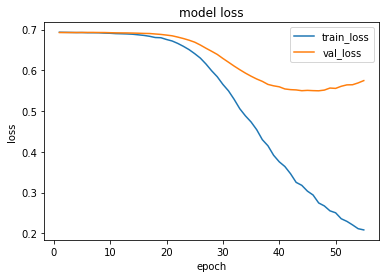

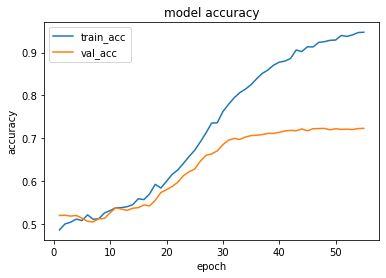

                                                                                                                      after_stpw  \
0  new month bring new knife udec nthis month blade nthis blade create input many blade enthusiast drawing qa printed model nlet   
1                                      follow nwhat paradise uded double tap nfollow exotic content udcf nfollow nfollow nfollow   

   P/N DT MNB BNB LG RF SVM  NN  
0    0  0   1   1  1  1   1   0  
1    0  0   1   1  1  0   1   0  
0.6294073518379595 0.7445611402850713 0.7520630157539385 0.7426856714178545 0.6961740435108777 0.7404351087771943 0.7233942747116089
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 32, 16)            160000    
_________________________________________________________________
flatten_9 (Flatten)          (None, 512)               0         
________________

In [81]:
def loadandDump(tag, nop):
    print(nop)
    class using_hashtags:
        def Create_Dir(self, dir_name):
            if not os.path.exists("data"):
                try:
                    os.mkdir("data")
                    print("Created directory 'data'")
                except:
                    print("Unable to create directory 'data': Directory already exists")
            else:
                print("Unable to create directory 'data': Directory already exists")

            if not os.path.exists("data/data_" + dir_name):
                try:
                    os.mkdir("data/data_" + dir_name)
                    print("Created directory 'data/data_" + dir_name + "'")
                except:
                    print("Unable to create directory 'data/data_" + dir_name + "': Directory already exists")
            else:
                print("Unable to create directory 'data/data_" + dir_name + "': Directory already exists")

            if not os.path.exists("data/data_" + dir_name + '/img'):
                try:
                    os.mkdir("data/data_" + dir_name + '/img')
                    print("Created directory 'data/data_" + dir_name + "/img'")
                except:
                    print("Unable to create directory 'data/data_" + dir_name + "/img': Directory already exists")
            else:
                print("Unable to create directory 'data/data_" + dir_name + "/img': Directory already exists")



        def Scrape_Instagram(self, tag, limit, browser='chrome'):
            self.Create_Dir(tag)

            print("Starting Scrapping Instagram")
            file_path = "data/data_" + tag
            keyword = tag
                # Adding path.
            if not os.getcwd() in os.get_exec_path():
                    # print('adding path')
                if platform.system() == "Windows":
                    os.environ["PATH"] = os.environ["PATH"] + ";" + os.getcwd()
                else:
                    os.environ["PATH"] = os.environ["PATH"] + ":" + os.getcwd()

            # opening instagram in browser
            if 'chrome' in browser.lower():
                driver = webdriver.Chrome(executable_path = r"C:\Users\HP\Desktop\Final Project\chromedriver.exe")
            else:
                driver = webdriver.Firefox()
            driver.get("https://www.instagram.com/" + "explore/tags/" + tag)

            print("Loading Posts")
            time.sleep(10)
            print("Loading Data")

                # Clicking on load more once to load more images. Afterwards we will just
                # tap space to scroll to the page end to load more images
            actions = ActionChains(driver)
            actions.send_keys(Keys.SPACE).perform()
            actions.send_keys(Keys.SPACE).perform()
            actions.send_keys(Keys.SPACE).perform()

            time.sleep(5)



            img_src = []
            img_caption = []
            hashtags = {}


            time.sleep(10)
            print("Loading Caption")


            cap = []


            c = 0
            for x in driver.find_elements_by_tag_name("a"):
    #             print(x.get_attribute("href").split("/")[4])

                item = x.get_attribute("href").split("/")[4]
                print(cap)
                cap.append(item)
                c += 1

                if len(cap) == limit:
                    print(len(cap), limit)
                    break
                else:
                    if c == 20:
                        c = 0
                        time.sleep(60)
                    else:
                        continue
                    continue

 
            print(cap)

            count = 0

            for p in cap:
                url = f"https://www.instagram.com/p/{p}/"

                soup = BeautifulSoup(
                    requests.get(url, headers=headers).text, "html.parser"
                    )
                data = str(soup.find("script", {"type": "application/ld+json"}))

                caption = data[data.find('"caption":')+11 : data.find('","representativeOfPage"')]
                if TextBlob(caption).detect_language() == 'en':
    #                 print("ENGLISH")
                    img_caption.append(caption)

    #             print(caption)

                data_img = str(soup.find("body"))
                image = data_img[data_img.find("src")+6 : data_img.find('","config_width"')]
                img_src.append(image.replace('\\u0026', '&'))

    #             print(img_src)

                count += 1
                if count >= 15:
                    time.sleep(60)
                    count = 0
                else:
                    continue
#             print("img_caption/:", img_caption)




            tag_File = file_path + "/" + tag + "_Instagram.xlsx"
            
            wb = openpyxl.Workbook()
            ws_Captions = wb.create_sheet(title="Caption")
            col = 'A'
            row = 1

            print("Dumping data in excel file")
            for caption in img_caption:
                if caption!=None:
                    tags = caption.split("#")
#                         # write caption to excel file
                    ws_Captions[col + str(row)] = tags[0]
                    row += 1
                    

                    # strip tags
                tags = tags[1:]
                for tag in tags:
                    cleaned = tag.replace(" ", "").replace("\n", "")
                    cleaned = cleaned.lower()
                    if cleaned not in hashtags and len(cleaned) < 20:
                        hashtags[cleaned] = 1
                    elif cleaned in hashtags and len(cleaned) < 20:
                        hashtags[cleaned] = hashtags[cleaned] + 1

            # sort hashtags with frequencies and store them in excel
            hashtags = sorted(hashtags.items(), key=operator.itemgetter(1), reverse=True)

#             ws_Tags = wb.create_sheet(title="Tags")
#             tagName = 'A'
#             tagFreq = 'B'
#             row = 1

#             for tag in hashtags:
#                 ws_Tags[tagName + str(row)] = tag[0]
#                 ws_Tags[tagFreq + str(row)] = tag[1]
#                 row += 1

            wb.save(tag_File)

            print("Dumping Images. This will take some time!")
            row = 1
            for src in img_src:
                urllib.request.urlretrieve(src, file_path + '/img/Instagram_' + str(row) + ".jpeg")
                row += 1
                if (row % 10 == 0):
                    print("(" + str(row) + "/" + str(len(img_src)) + ") Images Downloaded")

            print("Closing Instagram")
            driver.quit()
            preprocess(tag_File)
            MLmodels(tag_File)



    
    class using_username:

        def Create_Dir(self, dir_name):
            if not os.path.exists("data"):
                try:
                    os.mkdir("data")
                    print("Created directory 'data'")
                except:
                    print("Unable to create directory 'data': Directory already exists")
            else:
                print("Unable to create directory 'data': Directory already exists")

            if not os.path.exists("data/data_" + dir_name):
                try:
                    os.mkdir("data/data_" + dir_name)
                    directory = "data/data_" + dir_name 
                    preprocess(directory)
                    print("Created directory 'data/data_" + dir_name + "'")
                except:
                    print("Unable to create directory 'data/data_" + dir_name + "': Directory already exists")
            else:
                print("Unable to create directory 'data/data_" + dir_name + "': Directory already exists")

            if not os.path.exists("data/data_" + dir_name + '/img'):
                try:
                    os.mkdir("data/data_" + dir_name + '/img')
                    print("Created directory 'data/data_" + dir_name + "/img'")
                except:
                    print("Unable to create directory 'data/data_" + dir_name + "/img': Directory already exists")
            else:
                print("Unable to create directory 'data/data_" + dir_name + "/img': Directory already exists")


        def username(self, name):

            self.Create_Dir(name)

            file_path = "data/data_" + name
            keyword = name

            driver = webdriver.Chrome(executable_path = r"C:\Users\HP\Desktop\Final Project\chromedriver.exe")    
            driver.get("https://www.instagram.com/"  + name + "/?__a=1")

            img_caption = []
            img_src = []
            hashtags = {}
            r = requests.get("https://www.instagram.com/" + name + "/?__a=1", headers = {'User-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.106 Safari/537.36'}).text
            print(r)
            j = json.loads(r)

            for i in range(len(j['graphql']['user']['edge_felix_video_timeline']['edges'])):
    #             pprint(j['graphql']['user']['edge_felix_video_timeline']['edges'][i]['node']['edge_media_to_caption']['edges'][0]['node']['text'])
                img_caption.append(j['graphql']['user']['edge_felix_video_timeline']['edges'][i]['node']['edge_media_to_caption']['edges'][0]['node']['text'])
            print(img_caption)

            for i in range(len(j['graphql']['user']['edge_felix_video_timeline']['edges'])):
    #             pprint(j['graphql']['user']['edge_felix_video_timeline']['edges'][i]['node']['display_url'])
                img_src.append(j['graphql']['user']['edge_felix_video_timeline']['edges'][i]['node']['display_url'])
    #         print(img_src)



            tag_File = file_path + "/" + name + "_Instagram.xlsx"
            wb = openpyxl.Workbook()
            ws_Captions = wb.create_sheet(title="Caption")
            col = 'A'
            row = 1

            print("Dumping data in excel file")
            for caption in img_caption:
                tags = caption.split("#")
                    # write caption to excel file
                ws_Captions[col + str(row)] = tags[0]
                row += 1

                    # strip tags
                tags = tags[1:]
                for tag in tags:
                    cleaned = tag.replace(" ", "").replace("\n", "")
                    cleaned = cleaned.lower()
                    if cleaned not in hashtags and len(cleaned) < 20:
                        hashtags[cleaned] = 1
                    elif cleaned in hashtags and len(cleaned) < 20:
                        hashtags[cleaned] = hashtags[cleaned] + 1

            # sort hashtags with frequencies and store them in excel
            hashtags = sorted(hashtags.items(), key=operator.itemgetter(1), reverse=True)

            ws_Tags = wb.create_sheet(title="Tags")
            tagName = 'A'
            tagFreq = 'B'
            row = 1

            for tag in hashtags:
                ws_Tags[tagName + str(row)] = tag[0]
                ws_Tags[tagFreq + str(row)] = tag[1]
                row += 1

            wb.save(tag_File)

            print("Dumping Images. This will take some time!")
            row = 1
            for src in img_src:
                urllib.request.urlretrieve(src, file_path + '/img/Instagram_' + str(row) + ".jpeg")
                row += 1
                if (row % 10 == 0):
                    print("(" + str(row) + "/" + str(len(img_src)) + ") Images Downloaded")



    hashtag = using_hashtags()

    hashtag.Scrape_Instagram(tag=tag,
                            limit=nop,
                            browser='chrome')
    
loadandDump('fun', 33)